In [51]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, explained_variance_score, median_absolute_error, r2_score, mean_absolute_percentage_error
from sklearn.model_selection import train_test_split
from scipy.stats import *
import h3
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from datetime import datetime
from math import floor
import matplotlib.pyplot as plt
import mlflow
import mlflow.sklearn

In [52]:
ride_columns = ['accepted_driver_id', 'created_at', 'passenger_id', 'source_lat',
       'source_lng', 'destination_lat', 'destination_lng', 'eta', 'provider',
       'ata', 'id', 'city']

khatkesh_columns = ['ride_id','driver_id','a_t_a_result.arrival_a_t_a','a_t_a_result.boarding_a_t_a','a_t_a_result.ride_a_t_a','a_t_a_result.arrival_probe_result.probe.point.lat','a_t_a_result.arrival_probe_result.probe.point.lon','a_t_a_result.arrival_probe_result.probe.timestamp','a_t_a_result.arrival_probe_result.confidence','a_t_a_result.arrival_probe_result.h3_index', 'a_t_a_result.arrival_probe_result.k_ring_level','a_t_a_result.boarding_probe_result.probe.point.lat','a_t_a_result.boarding_probe_result.probe.point.lon','a_t_a_result.boarding_probe_result.probe.timestamp','a_t_a_result.boarding_probe_result.confidence','a_t_a_result.boarding_probe_result.h3_index','a_t_a_result.boarding_probe_result.k_ring_level','a_t_a_result.final_destination_probe_result.probe.point.lat','a_t_a_result.final_destination_probe_result.probe.point.lon','a_t_a_result.final_destination_probe_result.probe.timestamp','a_t_a_result.final_destination_probe_result.confidence','a_t_a_result.final_destination_probe_result.h3_index','a_t_a_result.final_destination_probe_result.k_ring_level','a_t_a_result.destination_probe_result.probe.point.lat','a_t_a_result.destination_probe_result.probe.point.lon','a_t_a_result.destination_probe_result.probe.timestamp','a_t_a_result.destination_probe_result.confidence','a_t_a_result.destination_probe_result.h3_index','a_t_a_result.destination_probe_result.k_ring_level','a_t_a_result.extra_destination_probe_result.probe.point.lat','a_t_a_result.extra_destination_probe_result.probe.point.lon','a_t_a_result.extra_destination_probe_result.probe.timestamp','a_t_a_result.extra_destination_probe_result.confidence','a_t_a_result.extra_destination_probe_result.h3_index','a_t_a_result.extra_destination_probe_result.k_ring_level','pickup_a_d_d_result.distance','pickup_a_d_d_result.confidence','pickup_a_d_d_result.route_ratio','pickup_a_d_d_result.g_p_s_ratio','ride_a_d_d_result.distance','ride_a_d_d_result.confidence','ride_a_d_d_result.route_ratio','ride_a_d_d_result.g_p_s_ratio','total_a_d_d_confidence','in_ride_allotment','e_d_d','clickhouse_time','hash']

train_dates = ['2022-08-02', '2022-08-03', '2022-08-04', '2022-08-05', '2022-08-06', '2022-08-07', '2022-08-08',
               '2022-08-09', '2022-08-10', '2022-08-11', '2022-08-12', '2022-08-13', '2022-08-14', '2022-08-15',
               '2022-08-16', '2022-08-17', '2022-08-18', '2022-08-19', '2022-08-20', '2022-08-21', '2022-08-22',
               '2022-08-23', '2022-08-24', '2022-08-25', '2022-08-26', '2022-08-27', '2022-08-28', '2022-08-29',
               '2022-08-30', '2022-08-31', '2022-09-01', '2022-09-02', '2022-09-03', '2022-09-04', '2022-09-05',
               '2022-09-06', '2022-09-07', '2022-09-08', '2022-09-09', '2022-09-10']

train_holidays = ['2022-08-07', '2022-08-08']

test_dates = ['2022-09-11', '2022-09-12', '2022-09-13', '2022-09-14', '2022-09-15', '2022-09-16', '2022-09-17',
              '2022-09-18', '2022-09-19', '2022-09-20', '2022-09-21', '2022-09-22', '2022-09-23', '2022-09-24',
              '2022-09-25', '2022-09-26', '2022-09-27', '2022-09-28', '2022-09-29', '2022-09-30', '2022-10-01',
              '2022-10-02', '2022-10-03', '2022-10-04', '2022-10-05', '2022-10-06', '2022-10-07', '2022-10-08',
              '2022-10-09']

test_holidays = ['2022-09-17', '2022-09-25', '2022-09-27', '2022-10-05']

In [53]:
rides_train = pd.read_csv('../rides_train.csv')
rides_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4063341 entries, 0 to 4063340
Data columns (total 59 columns):
 #   Column                                                       Dtype  
---  ------                                                       -----  
 0   accepted_driver_id                                           int64  
 1   created_at                                                   object 
 2   passenger_id                                                 int64  
 3   source_lat                                                   float64
 4   source_lng                                                   float64
 5   destination_lat                                              float64
 6   destination_lng                                              float64
 7   eta                                                          int64  
 8   provider                                                     object 
 9   ata                                                          int64  

In [54]:
rides_test = pd.read_csv('../rides_test.csv')
rides_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2729988 entries, 0 to 2729987
Data columns (total 59 columns):
 #   Column                                                       Dtype  
---  ------                                                       -----  
 0   accepted_driver_id                                           int64  
 1   created_at                                                   object 
 2   passenger_id                                                 int64  
 3   source_lat                                                   float64
 4   source_lng                                                   float64
 5   destination_lat                                              float64
 6   destination_lng                                              float64
 7   eta                                                          int64  
 8   provider                                                     object 
 9   ata                                                          int64  

In [60]:
rides_train_p1 = rides_train[rides_train['eta'] < 240]
rides_train_p1

,accepted_driver_id,created_at,passenger_id,source_lat,source_lng,destination_lat,destination_lng,eta,provider,ata,...,pickup_a_d_d_result.g_p_s_ratio,ride_a_d_d_result.distance,ride_a_d_d_result.confidence,ride_a_d_d_result.route_ratio,ride_a_d_d_result.g_p_s_ratio,total_a_d_d_confidence,in_ride_allotment,e_d_d,clickhouse_time,hash
3,97781,2022-08-02 16:39:54,55660849,35.725231,51.300682,35.723122,51.305210,233,smapp-same-dc,225,...,0.029412,1.867,0.829941,0.0,0.264706,0.910896,0.0,0.000,2022-08-02 16:48:34,9945354151016190877
12,317478,2022-08-02 08:08:58,267068,35.700920,51.394260,35.702213,51.402920,233,smapp-same-dc,202,...,0.055556,2.470,1.000000,0.0,1.000000,1.000000,0.0,0.000,2022-08-02 08:14:56,16899282084104980555
67,128376,2022-08-02 09:01:08,45347698,35.754314,51.367249,35.762852,51.361256,239,smapp-same-dc,304,...,0.035714,4.840,1.000000,0.0,0.928571,1.000000,0.0,0.000,2022-08-02 09:12:18,9512960679721799369
75,1341800,2022-08-02 19:04:33,13109179,35.789753,51.360275,35.781090,51.362698,221,smapp-same-dc,232,...,0.055556,2.938,1.000000,0.0,1.000000,1.000000,0.0,0.000,2022-08-02 19:11:20,8906128359908797622
79,43045,2022-08-02 19:35:41,41508816,35.746120,51.785847,35.749157,51.782898,73,smapp-same-dc,379,...,0.033333,2.180,1.000000,0.0,1.000000,1.000000,0.0,0.000,2022-08-02 19:44:35,4470384800396366848
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4063276,4284303,2022-09-10 18:07:26,37444795,35.489132,51.683571,35.492367,51.688053,140,smapp-same-dc,203,...,0.000000,0.802,0.500000,0.0,0.000000,0.450000,0.0,0.784,2022-09-10 18:14:28,16070131232940133704
4063297,237886,2022-09-10 10:42:29,54124557,35.704048,51.371464,35.707951,51.368633,143,smapp-same-dc,137,...,0.066667,1.420,1.000000,0.0,0.933333,1.000000,0.0,0.766,2022-09-10 10:45:51,18439648283932156752
4063303,1139525,2022-09-10 17:03:54,19769556,35.777199,51.363144,35.779930,51.363510,197,smapp-same-dc,249,...,0.052632,2.058,1.000000,0.0,1.000000,1.000000,0.0,1.029,2022-09-10 17:12:21,1459795819409952963
4063312,4279185,2022-09-10 05:52:04,5498507,35.784218,51.312340,35.779770,51.316925,150,smapp-same-dc,325,...,0.000000,1.570,1.000000,0.0,1.000000,1.000000,0.0,0.890,2022-09-10 06:06:43,13508718859067842401


In [61]:
rides_test_p1 = rides_test[(rides_test['eta'] < 240)]
rides_test_p1

,accepted_driver_id,created_at,passenger_id,source_lat,source_lng,destination_lat,destination_lng,eta,provider,ata,...,pickup_a_d_d_result.g_p_s_ratio,ride_a_d_d_result.distance,ride_a_d_d_result.confidence,ride_a_d_d_result.route_ratio,ride_a_d_d_result.g_p_s_ratio,total_a_d_d_confidence,in_ride_allotment,e_d_d,clickhouse_time,hash
50,1690514,2022-09-11 12:10:02,43075200,35.746696,51.809055,35.741589,51.815136,197,smapp-same-dc,194,...,0.058824,2.454,1.000000,0.0,1.000000,1.000000,0.0,1.312,2022-09-11 12:16:16,12648055841766204422
53,27168,2022-09-11 21:22:04,18840025,35.734932,51.700504,35.732224,51.701290,230,smapp-same-dc,125,...,0.000000,3.102,0.757576,0.0,0.666667,0.699548,0.0,1.924,2022-09-11 21:37:58,2448778779504100720
59,3365732,2022-09-11 10:41:43,32047881,35.488155,51.678314,35.478748,51.689297,204,smapp-same-dc,313,...,0.026316,3.446,1.000000,0.0,1.000000,1.000000,0.0,1.764,2022-09-11 10:55:26,1420230050478445563
63,1160390,2022-09-11 15:28:42,35519269,35.651768,51.309757,35.656479,51.313698,201,smapp-same-dc,260,...,0.040000,1.912,1.000000,0.0,0.880000,1.000000,0.0,0.922,2022-09-11 15:44:24,11054509764042103124
108,2869046,2022-09-11 14:04:19,9434159,35.477215,50.953491,35.475529,50.964859,231,smapp-same-dc,225,...,0.041667,3.320,1.000000,0.0,0.916667,1.000000,0.0,1.326,2022-09-11 14:13:22,15446015075719135459
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2729883,1157008,2022-10-09 12:50:43,2027439,35.691677,51.477333,35.686195,51.478199,182,smapp-same-dc,215,...,0.047619,1.532,1.000000,0.0,1.000000,1.000000,0.0,0.826,2022-10-09 12:59:07,11199559009340634732
2729886,3156638,2022-10-09 21:40:46,17497503,35.484001,51.075790,35.492088,51.065224,239,smapp-same-dc,346,...,0.033333,1.542,0.500000,0.0,0.066667,0.536262,0.0,1.534,2022-10-09 21:52:45,8589969394506579023
2729892,55585,2022-10-09 16:07:42,44955461,35.764099,51.279369,35.765148,51.287888,227,smapp-same-dc,249,...,0.043478,1.644,1.000000,0.0,0.782609,1.000000,0.0,1.049,2022-10-09 16:17:18,17766747890812418945
2729915,4383171,2022-10-09 15:01:06,1725940,35.771122,51.371490,35.768410,51.367290,199,smapp-same-dc,222,...,0.000000,2.476,1.000000,0.0,0.666667,1.000000,0.0,1.238,2022-10-09 15:16:52,12056520275120392057


There are some duplicates in the data

In [62]:
rides_train_p1 = rides_train_p1.drop_duplicates(subset=['ride_id', 'ata'])
len(rides_train_p1)

232411

In [63]:
rides_test_p1 = rides_test_p1.drop_duplicates(subset=['ride_id', 'ata'])
len(rides_test_p1)

162559

In [64]:
rides_train_p1 = rides_train_p1[(rides_train_p1['a_t_a_result.ride_a_t_a'] < 10800)]
rides_train_p1.describe()

,accepted_driver_id,passenger_id,source_lat,source_lng,destination_lat,destination_lng,eta,ata,ride_id,city,...,pickup_a_d_d_result.route_ratio,pickup_a_d_d_result.g_p_s_ratio,ride_a_d_d_result.distance,ride_a_d_d_result.confidence,ride_a_d_d_result.route_ratio,ride_a_d_d_result.g_p_s_ratio,total_a_d_d_confidence,in_ride_allotment,e_d_d,hash
count,2.322280e+05,2.322280e+05,232228.000000,232228.000000,232228.000000,232228.000000,232228.000000,232228.000000,2.322280e+05,232228.0,...,232228.000000,232228.000000,232228.000000,232228.000000,232228.000000,232228.000000,232228.000000,232228.000000,232228.000000,2.322280e+05
mean,1.923511e+06,2.590200e+07,35.668948,51.418101,35.669316,51.418124,178.480399,236.316211,4.822754e+09,1.0,...,0.000641,0.038209,2.229508,0.890991,0.000405,0.757957,0.897022,0.089825,0.295535,9.221692e+18
std,1.431258e+06,1.772264e+07,0.112351,0.187586,0.112563,0.187633,45.302575,128.011024,6.059008e+07,0.0,...,0.023885,0.032175,3.059080,0.198648,0.011016,0.339123,0.184022,0.557880,0.591383,5.322468e+18
min,1.900000e+01,1.030000e+02,35.217724,50.901066,35.207340,50.900864,1.000000,120.000000,4.714483e+09,1.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.864321e+13
25%,4.577808e+05,7.614255e+06,35.626866,51.323916,35.627147,51.324116,150.000000,160.000000,4.770892e+09,1.0,...,0.000000,0.023810,1.392000,0.865836,0.000000,0.619048,0.889497,0.000000,0.000000,4.610033e+18
50%,1.862157e+06,2.757620e+07,35.707870,51.414223,35.708294,51.414305,187.000000,207.000000,4.823336e+09,1.0,...,0.000000,0.038462,2.014000,1.000000,0.000000,0.944444,1.000000,0.000000,0.000000,9.224361e+18
75%,3.239144e+06,4.051945e+07,35.744762,51.489441,35.745228,51.489704,216.000000,268.000000,4.871796e+09,1.0,...,0.000000,0.050000,2.734000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.382584e+19
max,4.330375e+06,5.737892e+07,35.839733,52.803043,35.837448,52.808331,239.000000,4323.000000,4.933913e+09,1.0,...,1.000000,1.000000,619.523132,1.000000,1.000000,1.000000,1.000000,15.503000,13.686000,1.844674e+19


In [65]:
rides_train_p1[rides_train_p1['a_t_a_result.ride_a_t_a'] < 30]

,accepted_driver_id,created_at,passenger_id,source_lat,source_lng,destination_lat,destination_lng,eta,provider,ata,...,pickup_a_d_d_result.g_p_s_ratio,ride_a_d_d_result.distance,ride_a_d_d_result.confidence,ride_a_d_d_result.route_ratio,ride_a_d_d_result.g_p_s_ratio,total_a_d_d_confidence,in_ride_allotment,e_d_d,clickhouse_time,hash
18338,372873,2022-08-02 23:15:11,49519334,35.683479,51.355721,35.683502,51.356110,74,smapp-same-dc,124,...,0.500000,0.000000,0.0,0.0,1.0,0.000000,0.0,0.000,2022-08-02 23:19:44,17795666483608234790
18488,3871336,2022-08-02 11:52:25,30538586,35.662914,51.415485,35.662846,51.415092,123,smapp-same-dc,301,...,0.333333,0.000000,0.0,0.0,1.0,0.000000,0.0,0.000,2022-08-02 12:02:00,8728229997523743126
25397,24045,2022-08-02 23:33:08,39812667,35.667412,51.451019,35.667976,51.451019,92,smapp-same-dc,130,...,0.500000,0.000000,0.0,0.0,1.0,0.000000,0.0,0.000,2022-08-02 23:36:20,8264576610560297475
26414,998718,2022-08-02 13:48:05,34238240,35.797268,51.425831,35.797348,51.425652,141,smapp-same-dc,182,...,0.500000,0.000000,0.0,0.0,1.0,0.900000,0.0,0.000,2022-08-02 14:06:40,5156568694006343705
26504,3342710,2022-08-02 08:22:03,53112431,35.662800,51.417221,35.662384,51.417370,237,smapp-same-dc,306,...,0.333333,0.000000,0.0,0.0,1.0,0.000000,0.0,0.000,2022-08-02 08:30:58,6783633920058987929
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4039637,1606059,2022-09-10 08:16:11,43779440,35.706417,51.405659,35.706669,51.413498,105,smapp-same-dc,266,...,0.333333,0.827000,0.5,0.0,1.0,0.450000,0.0,0.710,2022-09-10 08:24:10,9040607523112238520
4050450,3333335,2022-09-10 20:40:38,49174248,35.756664,52.765163,35.755009,52.773922,201,smapp-same-dc,178,...,0.000000,0.796869,0.0,0.0,1.0,0.750804,0.0,1.571,2022-09-10 20:54:48,11796572611123707306
4052249,3085630,2022-09-10 13:00:02,50315920,35.680958,51.401711,35.690468,51.403320,156,smapp-same-dc,192,...,0.333333,1.197000,0.5,0.0,1.0,0.450000,0.0,1.068,2022-09-10 13:05:13,1023573232163488917
4053525,4318712,2022-09-10 16:55:36,38542589,35.489143,50.906822,35.493786,50.904297,138,smapp-same-dc,134,...,0.000000,0.608061,0.0,0.0,1.0,0.000000,0.0,0.830,2022-09-10 16:59:38,5684002367920122253


In [66]:
rides_train_p1 = rides_train_p1[(rides_train_p1['a_t_a_result.destination_probe_result.confidence'] > 0.5) & (rides_train_p1['a_t_a_result.boarding_probe_result.confidence'] > 0.5)]
rides_train_p1.describe()

,accepted_driver_id,passenger_id,source_lat,source_lng,destination_lat,destination_lng,eta,ata,ride_id,city,...,pickup_a_d_d_result.route_ratio,pickup_a_d_d_result.g_p_s_ratio,ride_a_d_d_result.distance,ride_a_d_d_result.confidence,ride_a_d_d_result.route_ratio,ride_a_d_d_result.g_p_s_ratio,total_a_d_d_confidence,in_ride_allotment,e_d_d,hash
count,1.175620e+05,1.175620e+05,117562.000000,117562.000000,117562.000000,117562.000000,117562.000000,117562.000000,1.175620e+05,117562.0,...,117562.000000,117562.000000,117562.000000,117562.000000,117562.000000,117562.000000,117562.000000,117562.000000,117562.000000,1.175620e+05
mean,1.946067e+06,2.524746e+07,35.670908,51.414961,35.671288,51.414952,180.314472,249.295376,4.822811e+09,1.0,...,0.000076,0.047515,2.350975,0.967465,0.000085,0.912040,0.969388,0.082610,0.300369,9.228097e+18
std,1.440342e+06,1.754220e+07,0.111706,0.185219,0.111940,0.185284,43.507625,137.183002,6.051207e+07,0.0,...,0.007309,0.027435,2.145426,0.115291,0.004210,0.180063,0.093347,0.530481,0.598538,5.324420e+18
min,4.300000e+01,1.380000e+02,35.217724,50.901066,35.207340,50.901020,1.000000,120.000000,4.714488e+09,1.0,...,0.000000,0.002342,0.000000,0.000000,0.000000,0.012658,0.000000,0.000000,0.000000,1.069351e+14
25%,4.665155e+05,7.033883e+06,35.629670,51.322985,35.629894,51.322808,152.000000,170.000000,4.770865e+09,1.0,...,0.000000,0.034483,1.602000,1.000000,0.000000,0.916667,1.000000,0.000000,0.000000,4.616764e+18
50%,1.901142e+06,2.673653e+07,35.711018,51.411415,35.711092,51.411711,189.000000,219.000000,4.822882e+09,1.0,...,0.000000,0.043478,2.178000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,9.221631e+18
75%,3.284067e+06,3.951193e+07,35.745377,51.488274,35.745869,51.488541,216.000000,281.000000,4.872073e+09,1.0,...,0.000000,0.055556,2.858000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.382698e+19
max,4.329836e+06,5.737755e+07,35.832851,52.794163,35.832851,52.805916,239.000000,3743.000000,4.933906e+09,1.0,...,1.000000,1.000000,619.523132,1.000000,1.000000,1.000000,1.000000,15.503000,12.681000,1.844668e+19


In [67]:
rides_test_p1 = rides_test_p1[(rides_test_p1['a_t_a_result.destination_probe_result.confidence'] > 0.5) & (rides_test_p1['a_t_a_result.boarding_probe_result.confidence'] > 0.5)]
rides_test_p1.describe()

,accepted_driver_id,passenger_id,source_lat,source_lng,destination_lat,destination_lng,eta,ata,ride_id,city,...,pickup_a_d_d_result.route_ratio,pickup_a_d_d_result.g_p_s_ratio,ride_a_d_d_result.distance,ride_a_d_d_result.confidence,ride_a_d_d_result.route_ratio,ride_a_d_d_result.g_p_s_ratio,total_a_d_d_confidence,in_ride_allotment,e_d_d,hash
count,8.357500e+04,8.357500e+04,83575.000000,83575.000000,83575.000000,83575.000000,83575.000000,83575.000000,8.357500e+04,83575.0,...,83575.000000,83575.000000,83575.000000,83575.000000,83575.000000,83575.000000,83575.000000,83575.000000,83575.000000,8.357500e+04
mean,2.018377e+06,2.606091e+07,35.668232,51.417440,35.668629,51.417474,179.265271,253.692097,5.010283e+09,1.0,...,0.000084,0.047958,2.362244,0.966205,0.000093,0.916630,0.967303,0.018147,1.256835,9.229568e+18
std,1.473202e+06,1.784367e+07,0.112669,0.189318,0.112879,0.189412,44.431462,142.485594,4.408985e+07,0.0,...,0.007314,0.030259,1.320627,0.119080,0.003575,0.175771,0.099305,0.159708,0.585131,5.331364e+18
min,0.000000e+00,1.380000e+02,35.211025,50.901463,35.216919,50.900726,1.000000,120.000000,4.933929e+09,1.0,...,0.000000,0.003650,0.000000,0.000000,0.000000,0.026316,0.000000,0.000000,0.173000,7.706330e+14
25%,5.078470e+05,7.682872e+06,35.625462,51.323105,35.625826,51.323259,151.000000,172.000000,4.972321e+09,1.0,...,0.000000,0.033333,1.598000,1.000000,0.000000,0.923077,1.000000,0.000000,0.896000,4.615187e+18
50%,1.997329e+06,2.772010e+07,35.707874,51.414288,35.708263,51.414360,188.000000,221.000000,5.011510e+09,1.0,...,0.000000,0.043478,2.184000,1.000000,0.000000,1.000000,1.000000,0.000000,1.168000,9.237169e+18
75%,3.378086e+06,4.073212e+07,35.744417,51.490284,35.744976,51.490744,216.000000,285.000000,5.049265e+09,1.0,...,0.000000,0.055556,2.870000,1.000000,0.000000,1.000000,1.000000,0.000000,1.495000,1.385622e+19
max,4.420757e+06,5.813774e+07,35.834793,52.805283,35.828857,52.805771,239.000000,3211.000000,5.083667e+09,1.0,...,1.000000,1.000000,90.205673,1.000000,0.361546,1.000000,1.000000,5.486000,31.106001,1.844646e+19


In [68]:
rides_with_id = rides_train_p1

In [69]:
rides_train_p1 = rides_train_p1[['eta', 'ata', 'a_t_a_result.ride_a_t_a', 'created_at', 'source_lat', 'source_lng', 'destination_lat', 'destination_lng', 'e_d_d', 'clickhouse_time']]
rides_train_p1

,eta,ata,a_t_a_result.ride_a_t_a,created_at,source_lat,source_lng,destination_lat,destination_lng,e_d_d,clickhouse_time
12,233,202,180,2022-08-02 08:08:58,35.700920,51.394260,35.702213,51.402920,0.000,2022-08-02 08:14:56
75,221,232,172,2022-08-02 19:04:33,35.789753,51.360275,35.781090,51.362698,0.000,2022-08-02 19:11:20
86,229,205,188,2022-08-02 09:46:00,35.656780,51.431511,35.644650,51.438038,0.000,2022-08-02 09:51:54
91,231,301,296,2022-08-02 23:12:35,35.668369,51.399590,35.676445,51.396301,0.000,2022-08-02 23:22:02
110,225,242,248,2022-08-02 19:10:55,35.669849,51.437366,35.665779,51.437080,0.000,2022-08-02 19:19:02
...,...,...,...,...,...,...,...,...,...,...
4063219,119,305,276,2022-09-10 12:22:36,35.666042,51.410290,35.664806,51.406162,0.758,2022-09-10 12:30:08
4063222,91,240,192,2022-09-10 18:34:43,35.693901,51.383869,35.696499,51.382183,0.489,2022-09-10 18:42:11
4063234,216,432,312,2022-09-10 23:04:05,35.480900,51.678635,35.475414,51.687286,1.275,2022-09-10 23:17:21
4063297,143,137,147,2022-09-10 10:42:29,35.704048,51.371464,35.707951,51.368633,0.766,2022-09-10 10:45:51


In [70]:
rides_test_p1 = rides_test_p1[['eta', 'ata', 'a_t_a_result.ride_a_t_a', 'created_at', 'source_lat', 'source_lng', 'destination_lat', 'destination_lng', 'e_d_d', 'clickhouse_time']]
rides_test_p1

,eta,ata,a_t_a_result.ride_a_t_a,created_at,source_lat,source_lng,destination_lat,destination_lng,e_d_d,clickhouse_time
50,197,194,168,2022-09-11 12:10:02,35.746696,51.809055,35.741589,51.815136,1.312,2022-09-11 12:16:16
108,231,225,236,2022-09-11 14:04:19,35.477215,50.953491,35.475529,50.964859,1.326,2022-09-11 14:13:22
129,239,326,287,2022-09-11 00:27:14,35.743793,51.451809,35.750114,51.452038,1.733,2022-09-11 00:35:53
197,99,162,105,2022-09-11 16:57:39,35.637093,51.370960,35.637955,51.375969,0.674,2022-09-11 18:16:04
264,176,123,148,2022-09-11 14:12:00,35.724400,51.464272,35.724892,51.467640,0.939,2022-09-11 14:17:21
...,...,...,...,...,...,...,...,...,...,...
2729852,219,317,24,2022-10-09 14:32:09,35.711395,51.414448,35.708839,51.421368,0.992,2022-10-09 14:40:25
2729868,171,816,604,2022-10-09 14:16:45,35.748600,51.235535,35.753651,51.242142,2.800,2022-10-09 14:36:12
2729878,230,269,380,2022-10-09 16:59:23,35.423866,51.592743,35.424473,51.582977,1.667,2022-10-09 17:13:00
2729883,182,215,209,2022-10-09 12:50:43,35.691677,51.477333,35.686195,51.478199,0.826,2022-10-09 12:59:07


In [71]:
# rides_train_p1['source_h3_4'] = rides_train_p1.apply(lambda row: h3.geo_to_h3(row.source_lat, row.source_lng, 4), axis=1)
# rides_train_p1['dest_h3_4'] = rides_train_p1.apply(lambda row: h3.geo_to_h3(row.destination_lat, row.destination_lng, 4), axis=1)
rides_train_p1['hour'] = rides_train_p1.apply(lambda row: ((datetime.timestamp(datetime.strptime(row.created_at,"%Y-%m-%d %H:%M:%S")) - 1662147000) % 604800) / 3600, axis=1)
rides_train_p1['holiday'] = rides_train_p1.apply(lambda row: int(row.created_at.split()[0] in train_holidays), axis=1)
rides_train_p1

/var/folders/yq/707ysz_j3jlggmtk5clx13rm0000gn/T/ipykernel_56041/1174177227.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rides_train_p1['hour'] = rides_train_p1.apply(lambda row: ((datetime.timestamp(datetime.strptime(row.created_at,"%Y-%m-%d %H:%M:%S")) - 1662147000) % 604800) / 3600, axis=1)
/var/folders/yq/707ysz_j3jlggmtk5clx13rm0000gn/T/ipykernel_56041/1174177227.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rides_train_p1['holiday'] = rides_train_p1.apply(lambda row: int(row.created_at.sp

,eta,ata,a_t_a_result.ride_a_t_a,created_at,source_lat,source_lng,destination_lat,destination_lng,e_d_d,clickhouse_time,hour,holiday
12,233,202,180,2022-08-02 08:08:58,35.700920,51.394260,35.702213,51.402920,0.000,2022-08-02 08:14:56,80.149444,0
75,221,232,172,2022-08-02 19:04:33,35.789753,51.360275,35.781090,51.362698,0.000,2022-08-02 19:11:20,91.075833,0
86,229,205,188,2022-08-02 09:46:00,35.656780,51.431511,35.644650,51.438038,0.000,2022-08-02 09:51:54,81.766667,0
91,231,301,296,2022-08-02 23:12:35,35.668369,51.399590,35.676445,51.396301,0.000,2022-08-02 23:22:02,95.209722,0
110,225,242,248,2022-08-02 19:10:55,35.669849,51.437366,35.665779,51.437080,0.000,2022-08-02 19:19:02,91.181944,0
...,...,...,...,...,...,...,...,...,...,...,...,...
4063219,119,305,276,2022-09-10 12:22:36,35.666042,51.410290,35.664806,51.406162,0.758,2022-09-10 12:30:08,12.376667,0
4063222,91,240,192,2022-09-10 18:34:43,35.693901,51.383869,35.696499,51.382183,0.489,2022-09-10 18:42:11,18.578611,0
4063234,216,432,312,2022-09-10 23:04:05,35.480900,51.678635,35.475414,51.687286,1.275,2022-09-10 23:17:21,23.068056,0
4063297,143,137,147,2022-09-10 10:42:29,35.704048,51.371464,35.707951,51.368633,0.766,2022-09-10 10:45:51,10.708056,0


In [72]:
# rides_test_p1['source_h3_4'] = rides_test_p1.apply(lambda row: h3.geo_to_h3(row.source_lat, row.source_lng, 4), axis=1)
# rides_test_p1['dest_h3_4'] = rides_test_p1.apply(lambda row: h3.geo_to_h3(row.destination_lat, row.destination_lng, 4), axis=1)
rides_test_p1['hour'] = rides_test_p1.apply(lambda row: ((datetime.timestamp(datetime.strptime(row.created_at,"%Y-%m-%d %H:%M:%S")) - 1662147000) % 604800) / 3600, axis=1)
rides_test_p1['holiday'] = rides_test_p1.apply(lambda row: int(row.created_at.split()[0] in test_holidays), axis=1)
rides_test_p1

,eta,ata,a_t_a_result.ride_a_t_a,created_at,source_lat,source_lng,destination_lat,destination_lng,e_d_d,clickhouse_time,hour,holiday
50,197,194,168,2022-09-11 12:10:02,35.746696,51.809055,35.741589,51.815136,1.312,2022-09-11 12:16:16,36.167222,0
108,231,225,236,2022-09-11 14:04:19,35.477215,50.953491,35.475529,50.964859,1.326,2022-09-11 14:13:22,38.071944,0
129,239,326,287,2022-09-11 00:27:14,35.743793,51.451809,35.750114,51.452038,1.733,2022-09-11 00:35:53,24.453889,0
197,99,162,105,2022-09-11 16:57:39,35.637093,51.370960,35.637955,51.375969,0.674,2022-09-11 18:16:04,40.960833,0
264,176,123,148,2022-09-11 14:12:00,35.724400,51.464272,35.724892,51.467640,0.939,2022-09-11 14:17:21,38.200000,0
...,...,...,...,...,...,...,...,...,...,...,...,...
2729852,219,317,24,2022-10-09 14:32:09,35.711395,51.414448,35.708839,51.421368,0.992,2022-10-09 14:40:25,39.535833,0
2729868,171,816,604,2022-10-09 14:16:45,35.748600,51.235535,35.753651,51.242142,2.800,2022-10-09 14:36:12,39.279167,0
2729878,230,269,380,2022-10-09 16:59:23,35.423866,51.592743,35.424473,51.582977,1.667,2022-10-09 17:13:00,41.989722,0
2729883,182,215,209,2022-10-09 12:50:43,35.691677,51.477333,35.686195,51.478199,0.826,2022-10-09 12:59:07,37.845278,0


In [96]:
train_p1_geo_x = rides_train_p1[["eta", "source_lat", "source_lng", "destination_lat", "destination_lng", "hour", "holiday"]]
# train_p1_h3_x = rides_train_p1[["eta", "source_h3_4", "dest_h3_4", "hour", "holiday"]]
train_p1_geo_y = rides_train_p1["a_t_a_result.ride_a_t_a"]
# train_p1_h3_y = rides_train_p1["a_t_a_result.ride_a_t_a"]

In [97]:
test_p1_geo_x = rides_test_p1[["eta", "source_lat", "source_lng", "destination_lat", "destination_lng", "hour", "holiday"]]
# test_p1_h3_x = rides_test_p1[["eta", "source_h3_4", "dest_h3_4", "hour", "holiday"]]
test_p1_geo_y = rides_test_p1["a_t_a_result.ride_a_t_a"]
# test_p1_h3_y = rides_test_p1["a_t_a_result.ride_a_t_a"]

In [98]:
# dummy_train_rides = pd.get_dummies(train_p1_h3_x, prefix={'source_h3_4':'source_h3_4',
#                                                              'dest_h3_4':'dest_h3_4'})
# dummy_train_rides.describe()

In [99]:
# print(np.count_nonzero(dummy_train_rides, axis=0))
# print(dummy_train_rides.columns)

In [100]:
# geo_noise = np.count_nonzero(dummy_train_rides, axis=0) < 100
#
# cols = dummy_train_rides.columns
# for col, noise in zip(cols, geo_noise):
#     if noise:
#         # DOESN'T REINDEX
#         # remove the rows where rides_train_p1_x is in the noisy geo (geo is 1)
#         train_p1_h3_x = train_p1_h3_x[dummy_train_rides[col] == 0]
#         train_p1_h3_y = train_p1_h3_y[dummy_train_rides[col] == 0]
#
# train_p1_h3_x.describe()

In [101]:
# ohe = ColumnTransformer(
#     [('OHE', OneHotEncoder(handle_unknown='ignore', sparse=False),['source_h3_4', 'dest_h3_4'])],
#     remainder = 'passthrough'
#     ).fit(train_p1_h3_x)

In [102]:
# ohe.get_feature_names_out()

In [103]:
# train_p1_h3_x = ohe.transform(train_p1_h3_x)

In [104]:
# test_p1_h3_x = ohe.transform(test_p1_h3_x)

In [105]:
train_p1_geo_x = train_p1_geo_x

In [106]:
train_p1_geo_x[abs(train_p1_geo_x['eta'] - train_p1_geo_y) > 1200]

,eta,source_lat,source_lng,destination_lat,destination_lng,hour,holiday
57930,204,35.750336,51.312141,35.758568,51.316292,87.725833,0
67821,200,35.307747,51.714966,35.303715,51.726273,83.683056,0
96564,184,35.582455,51.434765,35.585747,51.428162,83.721667,0
137437,220,35.742451,51.440407,35.743649,51.447483,106.272500,0
149238,210,35.642624,51.451149,35.638569,51.457859,97.773333,0
...,...,...,...,...,...,...,...
3969697,219,35.469601,50.976524,35.477013,50.988403,22.452778,0
3982789,196,35.700195,51.394398,35.703911,51.387062,13.794444,0
3988781,173,35.761906,51.449863,35.765755,51.442642,7.951667,0
4011371,167,35.811558,51.456036,35.808960,51.462925,15.348611,0


In [107]:
rational_index = abs(train_p1_geo_x['eta'] - train_p1_geo_y) < 1200

In [108]:
train_p1_geo_x = train_p1_geo_x[rational_index]
train_p1_geo_y = train_p1_geo_y[rational_index]

In [109]:
test_rational_index = abs(test_p1_geo_x['eta'] - test_p1_geo_y) < 1200
test_p1_geo_x = test_p1_geo_x[test_rational_index]
test_p1_geo_y = test_p1_geo_y[test_rational_index]

In [110]:
train_eta = train_p1_geo_x['eta']
test_eta = test_p1_geo_x['eta']

# train_p1_geo_x = train_p1_geo_x[["source_lat", "source_lng", "destination_lat", "destination_lng", "hour", "holiday"]]
# test_p1_geo_x = test_p1_geo_x[["source_lat", "source_lng", "destination_lat", "destination_lng", "hour", "holiday"]]

In [111]:
reg_geo_p1 = LinearRegression().fit(train_p1_geo_x, train_p1_geo_y)

In [112]:
print(reg_geo_p1.coef_)
print(reg_geo_p1.intercept_)

[ 7.49037768e-01  3.80826772e+02 -6.71492675e+01 -4.16489345e+02
  8.87284871e+01  2.33110835e-02  1.65502660e+01]
276.2614924240204


In [113]:
train_pred_geo = reg_geo_p1.predict(train_p1_geo_x)
test_pred_geo = reg_geo_p1.predict(test_p1_geo_x)

In [114]:
print("ETA train MAE", mean_absolute_error(train_p1_geo_y, train_eta))
print("prediction train MAE", mean_absolute_error(train_p1_geo_y, train_pred_geo))

print("ETA test MAE ", mean_absolute_error(test_p1_geo_y, test_eta))
print("prediction test MAE", mean_absolute_error(test_p1_geo_y, test_pred_geo))


print("ETA train MSE", mean_squared_error(train_p1_geo_y, train_eta))
print("prediction train MSE", mean_squared_error(train_p1_geo_y, train_pred_geo))

print("ETA test MSE ", mean_squared_error(test_p1_geo_y, test_eta))
print("prediction test MSE", mean_squared_error(test_p1_geo_y, test_pred_geo))


print("ETA train explained_variance_score", explained_variance_score(train_p1_geo_y, train_eta))
print("prediction train explained_variance_score", explained_variance_score(train_p1_geo_y, train_pred_geo))

print("ETA test explained_variance_score ", explained_variance_score(test_p1_geo_y, test_eta))
print("prediction test explained_variance_score", explained_variance_score(test_p1_geo_y, test_pred_geo))


print("ETA train median_absolute_error", median_absolute_error(train_p1_geo_y, train_eta))
print("prediction train median_absolute_error", median_absolute_error(train_p1_geo_y, train_pred_geo))

print("ETA test median_absolute_error ", median_absolute_error(test_p1_geo_y, test_eta))
print("prediction test median_absolute_error", median_absolute_error(test_p1_geo_y, test_pred_geo))


print("ETA train r2_score", r2_score(train_p1_geo_y, train_eta))
print("prediction train r2_score", r2_score(train_p1_geo_y, train_pred_geo))

print("ETA test r2_score ", r2_score(test_p1_geo_y, test_eta))
print("prediction test r2_score", r2_score(test_p1_geo_y, test_pred_geo))


print("ETA train MAPE", mean_absolute_percentage_error(train_p1_geo_y, train_eta))
print("prediction train MAPE", mean_absolute_percentage_error(train_p1_geo_y, train_pred_geo))

print("ETA test MAPE ", mean_absolute_percentage_error(test_p1_geo_y, test_eta))
print("prediction test MAPE", mean_absolute_percentage_error(test_p1_geo_y, test_pred_geo))

ETA train MAE 85.36194134732503
prediction train MAE 79.99119796725861
ETA test MAE  88.19396618861052
prediction test MAE 82.69420908785025
ETA train MSE 20113.18526783813
prediction train MSE 14992.4037915279
ETA test MSE  21865.363370595354
prediction test MSE 16383.736459760676
ETA train explained_variance_score 0.05838924324797656
prediction train explained_variance_score 0.06827066893402967
ETA test explained_variance_score  0.04865176824613571
prediction test explained_variance_score 0.05903326186411495
ETA train median_absolute_error 48.0
prediction train median_absolute_error 61.54443013809157
ETA test median_absolute_error  49.0
prediction test median_absolute_error 62.65692715471573
ETA train r2_score -0.24996931217918594
prediction train r2_score 0.06827066893402967
ETA test r2_score  -0.25585175453360476
prediction test r2_score 0.058989149639437244
ETA train MAPE 0.2935081330060359
prediction train MAPE 0.36658696566648313
ETA test MAPE  0.3075215737648861
prediction test

In [115]:
from sklearn.neighbors import KNeighborsRegressor
neigh = KNeighborsRegressor(n_neighbors=50)
neigh.fit(train_p1_geo_x, train_p1_geo_y)

KNeighborsRegressor(n_neighbors=50)

In [116]:
train_knn_pred_geo = neigh.predict(train_p1_geo_x)

In [117]:
test_knn_pred_geo = neigh.predict(test_p1_geo_x)

In [118]:
print("ETA train MAE", mean_absolute_error(train_p1_geo_y, train_eta))
print("prediction train MAE", mean_absolute_error(train_p1_geo_y, train_knn_pred_geo))

print("ETA test MAE ", mean_absolute_error(test_p1_geo_y, test_eta))
print("prediction test MAE", mean_absolute_error(test_p1_geo_y, test_knn_pred_geo))


print("ETA train MSE", mean_squared_error(train_p1_geo_y, train_eta))
print("prediction train MSE", mean_squared_error(train_p1_geo_y, train_knn_pred_geo))

print("ETA test MSE ", mean_squared_error(test_p1_geo_y, test_eta))
print("prediction test MSE", mean_squared_error(test_p1_geo_y, test_knn_pred_geo))


print("ETA train explained_variance_score", explained_variance_score(train_p1_geo_y, train_eta))
print("prediction train explained_variance_score", explained_variance_score(train_p1_geo_y, train_knn_pred_geo))

print("ETA test explained_variance_score ", explained_variance_score(test_p1_geo_y, test_eta))
print("prediction test explained_variance_score", explained_variance_score(test_p1_geo_y, test_knn_pred_geo))


print("ETA train median_absolute_error", median_absolute_error(train_p1_geo_y, train_eta))
print("prediction train median_absolute_error", median_absolute_error(train_p1_geo_y, train_knn_pred_geo))

print("ETA test median_absolute_error ", median_absolute_error(test_p1_geo_y, test_eta))
print("prediction test median_absolute_error", median_absolute_error(test_p1_geo_y, test_knn_pred_geo))


print("ETA train r2_score", r2_score(train_p1_geo_y, train_eta))
print("prediction train r2_score", r2_score(train_p1_geo_y, train_knn_pred_geo))

print("ETA test r2_score ", r2_score(test_p1_geo_y, test_eta))
print("prediction test r2_score", r2_score(test_p1_geo_y, test_knn_pred_geo))


print("ETA train MAPE", mean_absolute_percentage_error(train_p1_geo_y, train_eta))
print("prediction train MAPE", mean_absolute_percentage_error(train_p1_geo_y, train_knn_pred_geo))

print("ETA test MAPE ", mean_absolute_percentage_error(test_p1_geo_y, test_eta))
print("prediction test MAPE", mean_absolute_percentage_error(test_p1_geo_y, test_knn_pred_geo))

ETA train MAE 85.36194134732503
prediction train MAE 79.4045314003901
ETA test MAE  88.19396618861052
prediction test MAE 83.63212105963122
ETA train MSE 20113.18526783813
prediction train MSE 14676.667326947352
ETA test MSE  21865.363370595354
prediction test MSE 16680.831023509818
ETA train explained_variance_score 0.05838924324797656
prediction train explained_variance_score 0.08789743437413544
ETA test explained_variance_score  0.04865176824613571
prediction test explained_variance_score 0.04205210627116873
ETA train median_absolute_error 48.0
prediction train median_absolute_error 60.25999999999999
ETA test median_absolute_error  49.0
prediction test median_absolute_error 62.66
ETA train r2_score -0.24996931217918594
prediction train r2_score 0.0878926674492383
ETA test r2_score  -0.25585175453360476
prediction test r2_score 0.04192532486675993
ETA train MAPE 0.2935081330060359
prediction train MAPE 0.3626707769678984
ETA test MAPE  0.3075215737648861
prediction test MAPE 0.388668

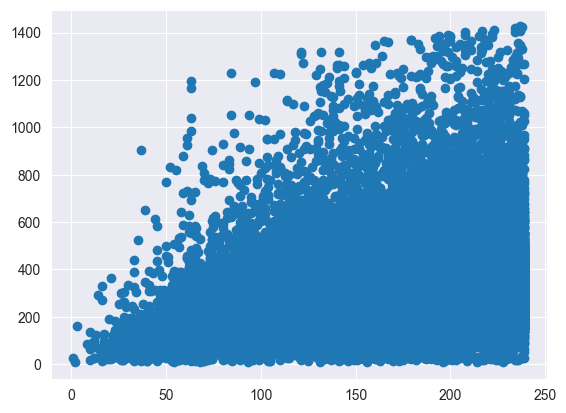

In [119]:
plt.scatter(train_eta, train_p1_geo_y)

In [120]:
import seaborn as sns

<AxesSubplot: ylabel='Count'>

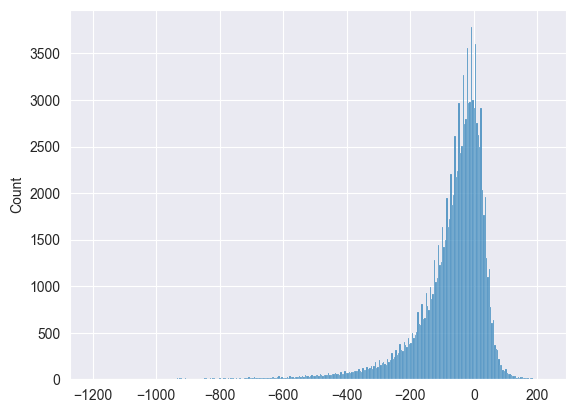

In [121]:
eta_err = train_p1_geo_x['eta'] - train_p1_geo_y
sns.histplot(eta_err)

In [122]:
print(eta_err.mean())
print(eta_err.std())
print(eta_err.kurtosis())
print(eta_err.skew())

-70.43990357997666
123.09156879026898
14.366472773059506
-2.959254456125847


<AxesSubplot: xlabel='a_t_a_result.ride_a_t_a', ylabel='Count'>

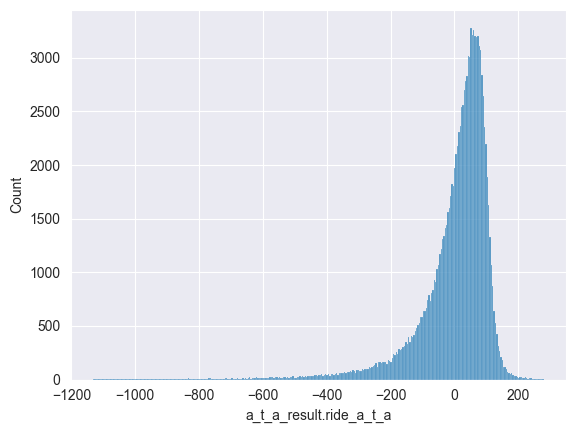

In [123]:
pred_err = train_pred_geo - train_p1_geo_y
sns.histplot(pred_err)

In [124]:
print(pred_err.mean())
print(pred_err.std())
print(pred_err.kurtosis())
print(pred_err.skew())

1.0837739135970347e-13
122.44399329065602
14.808795900835666
-3.020112452387905


In [154]:
reg_h3_p1 = LinearRegression().fit(train_p1_h3_x, train_p1_h3_y)

In [155]:
print(reg_h3_p1.coef_)
print(reg_h3_p1.intercept_)

[ 1.26783627e+10  1.26783627e+10  3.36497938e+11  1.26783627e+10
  1.26783627e+10  1.26783627e+10  1.26783627e+10  1.26783627e+10
 -2.61619424e+09 -2.61619425e+09 -3.26435770e+11 -2.61619425e+09
 -2.61619425e+09 -2.61619425e+09 -2.61619424e+09 -2.61619425e+09
  9.86321442e-01 -2.57691789e-02  8.68180725e+00]
-10062168381.208202


In [156]:
train_pred_h3 = reg_h3_p1.predict(train_p1_h3_x)
test_pred_h3 = reg_h3_p1.predict(test_p1_h3_x)

In [157]:
known_h3_index = np.count_nonzero(test_p1_h3_x[:, 0:17], axis=1) == 2

In [158]:
test_p1_h3_y = test_p1_h3_y[known_h3_index]
test_p1_h3_x = test_p1_h3_x[known_h3_index]
test_pred_h3 = test_pred_h3[known_h3_index]

In [106]:
d = {'eta': train_p1_geo_x['eta'], 'seldon': train_pred_geo, 'ata': train_p1_geo_y, 'eta - ata': train_p1_geo_x['eta'] - train_p1_geo_y, 'seldon - ata': train_pred_geo - train_p1_geo_y}
df = pd.DataFrame(data=d)
df[abs(df['eta - ata']) > 2200]

,eta,seldon,ata,eta - ata,seldon - ata
30431,487,550.287697,2692,-2205,-2141.712303
33650,573,623.498899,2860,-2287,-2236.501101
48047,497,552.241702,2784,-2287,-2231.758298
57240,479,533.668282,3476,-2997,-2942.331718
62110,385,441.807240,2666,-2281,-2224.192760
...,...,...,...,...,...
3981253,257,317.214866,2487,-2230,-2169.785134
3991984,561,617.029826,2900,-2339,-2282.970174
4019586,541,586.472797,4093,-3552,-3506.527203
4046754,564,615.140795,4954,-4390,-4338.859205


In [110]:
rides_with_id.loc[57240]

accepted_driver_id                                                          780959
created_at                                                     2022-08-02 17:55:13
passenger_id                                                              33690008
source_lat                                                                35.74675
source_lng                                                               51.395435
destination_lat                                                           35.74765
destination_lng                                                          51.412968
eta                                                                            479
provider                                                             smapp-same-dc
ata                                                                           3529
ride_id                                                                 4718717919
city                                                                             1
driv

In [111]:
1659450530 - 1659447054.0

3476.0

In [100]:
train_p1_geo_y.loc[5]

602

In [85]:
rides_with_id.loc[1168]

accepted_driver_id                                                          272800
created_at                                                     2022-08-02 14:30:46
passenger_id                                                              23145890
source_lat                                                               35.795856
source_lng                                                               51.451664
destination_lat                                                          35.810123
destination_lng                                                          51.459946
eta                                                                            506
provider                                                             smapp-same-dc
ata                                                                           1261
ride_id                                                                 4717549146
city                                                                             1
driv

In [163]:
print("ETA train MAE", mean_absolute_error(train_p1_geo_y, train_p1_geo_x['eta']))
print("prediction train MAE", mean_absolute_error(train_p1_geo_y, train_pred_geo))

print("ETA test MAE ", mean_absolute_error(test_p1_geo_y, test_p1_geo_x['eta']))
print("prediction test MAE", mean_absolute_error(test_p1_geo_y, test_pred_geo))


print("ETA train MSE", mean_squared_error(train_p1_geo_y, train_p1_geo_x['eta']))
print("prediction train MSE", mean_squared_error(train_p1_geo_y, train_pred_geo))

print("ETA test MSE ", mean_squared_error(test_p1_geo_y, test_p1_geo_x['eta']))
print("prediction test MSE", mean_squared_error(test_p1_geo_y, test_pred_geo))


print("ETA train explained_variance_score", explained_variance_score(train_p1_geo_y, train_p1_geo_x['eta']))
print("prediction train explained_variance_score", explained_variance_score(train_p1_geo_y, train_pred_geo))

print("ETA test explained_variance_score ", explained_variance_score(test_p1_geo_y, test_p1_geo_x['eta']))
print("prediction test explained_variance_score", explained_variance_score(test_p1_geo_y, test_pred_geo))


print("ETA train median_absolute_error", median_absolute_error(train_p1_geo_y, train_p1_geo_x['eta']))
print("prediction train median_absolute_error", median_absolute_error(train_p1_geo_y, train_pred_geo))

print("ETA test median_absolute_error ", median_absolute_error(test_p1_geo_y, test_p1_geo_x['eta']))
print("prediction test median_absolute_error", median_absolute_error(test_p1_geo_y, test_pred_geo))


print("ETA train r2_score", r2_score(train_p1_geo_y, train_p1_geo_x['eta']))
print("prediction train r2_score", r2_score(train_p1_geo_y, train_pred_geo))

print("ETA test r2_score ", r2_score(test_p1_geo_y, test_p1_geo_x['eta']))
print("prediction test r2_score", r2_score(test_p1_geo_y, test_pred_geo))


print("ETA train MAPE", mean_absolute_percentage_error(train_p1_geo_y, train_p1_geo_x['eta']))
print("prediction train MAPE", mean_absolute_percentage_error(train_p1_geo_y, train_pred_geo))

print("ETA test MAPE ", mean_absolute_percentage_error(test_p1_geo_y, test_p1_geo_x['eta']))
print("prediction test MAPE", mean_absolute_percentage_error(test_p1_geo_y, test_pred_geo))

ETA train MAE 1700.089602299952
prediction train MAE 391.8828847826638
ETA test MAE  1694.576439790576
prediction test MAE 380.4741775617792
ETA train MSE 3238072.5486344034
prediction train MSE 341481.57597539
ETA test MSE  3154440.089528796
prediction test MSE 280567.6058180186
ETA train explained_variance_score 0.07859980641326159
prediction train explained_variance_score 0.09525520688694078
ETA test explained_variance_score  0.09515334409077303
prediction test explained_variance_score 0.10264539398016503
ETA train median_absolute_error 1522.0
prediction train median_absolute_error 320.54520771353054
ETA test median_absolute_error  1525.0
prediction test median_absolute_error 320.9049128872866
ETA train r2_score -7.579172301554692
prediction train r2_score 0.09525520688694078
ETA test r2_score  -9.091132059069732
prediction test r2_score 0.10245727246334457
ETA train MAPE 0.7916681339449584
prediction train MAPE 0.17171132174216008
ETA test MAPE  0.7898949720861153
prediction test M

In [46]:
train_p4_geo_x_normalized = (train_p4_geo_x - train_p4_geo_x.min()) / (train_p4_geo_x.max() - train_p4_geo_x.min())
train_p4_geo_y_normalized = (train_p4_geo_y - train_p4_geo_y.min()) / (train_p4_geo_y.max() - train_p4_geo_y.min())
# test_p4_geo_x_normalized = (test_p4_geo_x - train_p4_geo_x.min()) / (train_p4_geo_x.max() - train_p4_geo_x.min())
# test_p4_geo_y_normalized = (test_p4_geo_y - train_p4_geo_y.min()) / (train_p4_geo_y.max() - train_p4_geo_y.min())

reg_p4_geo_normalized = LinearRegression().fit(train_p4_geo_x_normalized, train_p4_geo_y_normalized)
print(reg_p4_geo_normalized.coef_)
print(reg_p4_geo_normalized.intercept_)

[ 0.95267888  0.03992745  0.01639903  0.14161629  0.07104881 -0.00869313
 -0.01985985]
0.027375837176890544


In [39]:
print("ETA train MAE", mean_absolute_error(train_p4_h3_y, train_p4_h3_x[:, 17]))
print("prediction train MAE", mean_absolute_error(train_p4_h3_y, train_pred_h3))

print("ETA test MAE ", mean_absolute_error(test_p4_h3_y, test_p4_h3_x[:, 17]))
print("prediction test MAE", mean_absolute_error(test_p4_h3_y, test_pred_h3))


print("ETA train MSE", mean_squared_error(train_p4_h3_y, train_p4_h3_x[:, 17]))
print("prediction train MSE", mean_squared_error(train_p4_h3_y, train_pred_h3))

print("ETA test MSE ", mean_squared_error(test_p4_h3_y, test_p4_h3_x[:, 17]))
print("prediction test MSE", mean_squared_error(test_p4_h3_y, test_pred_h3))


print("ETA train explained_variance_score", explained_variance_score(train_p4_h3_y, train_p4_h3_x[:, 17]))
print("prediction train explained_variance_score", explained_variance_score(train_p4_h3_y, train_pred_h3))

print("ETA test explained_variance_score ", explained_variance_score(test_p4_h3_y, test_p4_h3_x[:, 17]))
print("prediction test explained_variance_score", explained_variance_score(test_p4_h3_y, test_pred_h3))


print("ETA train median_absolute_error", median_absolute_error(train_p4_h3_y, train_p4_h3_x[:, 17]))
print("prediction train median_absolute_error", median_absolute_error(train_p4_h3_y, train_pred_h3))

print("ETA test median_absolute_error ", median_absolute_error(test_p4_h3_y, test_p4_h3_x[:, 17]))
print("prediction test median_absolute_error", median_absolute_error(test_p4_h3_y, test_pred_h3))


print("ETA train r2_score", r2_score(train_p4_h3_y, train_p4_h3_x[:, 17]))
print("prediction train r2_score", r2_score(train_p4_h3_y, train_pred_h3))

print("ETA test r2_score ", r2_score(test_p4_h3_y, test_p4_h3_x[:, 17]))
print("prediction test r2_score", r2_score(test_p4_h3_y, test_pred_h3))


print("ETA train MAPE", mean_absolute_percentage_error(train_p4_h3_y, train_p4_h3_x[:, 17]))
print("prediction train MAPE", mean_absolute_percentage_error(train_p4_h3_y, train_pred_h3))

print("ETA test MAPE ", mean_absolute_percentage_error(test_p4_h3_y, test_p4_h3_x[:, 17]))
print("prediction test MAPE", mean_absolute_percentage_error(test_p4_h3_y, test_pred_h3))

ETA train MAE 558.6899742605314
prediction train MAE 468.32320172854264
ETA test MAE  609.4802658229795
prediction test MAE 532.3905549659162
ETA train MSE 724259.5492995734
prediction train MSE 474510.4137146755
ETA test MSE  1005379.4640005743
prediction test MSE 706504.3378821977
ETA train explained_variance_score 0.5486781823287357
prediction train explained_variance_score 0.5735345690702949
ETA test explained_variance_score  0.4753275329161858
prediction test explained_variance_score 0.5084530615897137
ETA train median_absolute_error 353.0
prediction train median_absolute_error 347.19482421875
ETA test median_absolute_error  352.0
prediction test median_absolute_error 366.8814697265625
ETA train r2_score 0.3490729563150865
prediction train r2_score 0.5735345690702917
ETA test r2_score  0.2984759208241079
prediction test r2_score 0.5070221515223838
ETA train MAPE 0.16697790395524195
prediction train MAPE 0.1610154609737745
ETA test MAPE  0.1730999583791752
prediction test MAPE 0.17

In [47]:
train_p4_h3_x_normalized = (train_p4_h3_x - train_p4_h3_x.min()) / (train_p4_h3_x.max() - train_p4_h3_x.min())
train_p4_h3_y_normalized = (train_p4_h3_y - train_p4_h3_y.min()) / (train_p4_h3_y.max() - train_p4_h3_y.min())
# test_p4_h3_x_normalized = (test_p4_h3_x - train_p4_h3_x.min()) / (train_p4_h3_x.max() - train_p4_h3_x.min())
# test_p4_h3_y_normalized = (test_p4_h3_y - train_p4_h3_y.min()) / (train_p4_h3_y.max() - train_p4_h3_y.min())

reg_p4_h3_normalized = LinearRegression().fit(train_p4_h3_x_normalized, train_p4_h3_y_normalized)
print(reg_p4_h3_normalized.coef_)
print(reg_p4_h3_normalized.intercept_)

[ 3.38839243e+11  3.38839243e+11  3.38839244e+11  3.38839243e+11
  3.38839243e+11  3.38839243e+11  3.38839243e+11 -1.81469415e+11
 -1.81469415e+11 -1.81469415e+11 -1.81469415e+11 -1.81469415e+11
 -1.81469415e+11 -1.81469415e+11 -1.81469415e+11 -1.81469415e+11
 -1.81469415e+11  1.10072538e+00 -4.58049363e-01 -1.50679642e+02]
-17055362.3876918


In [ ]:
%set_env AWS_ACCESS_KEY_ID=SokXIEc1g9vNqCJt4CSObyk6vumoOOPQ
%set_env AWS_SECRET_ACCESS_KEY=QNyTpGhFjUTYSP9VKmfhpUizwKr0t8gk
%set_env MLFLOW_S3_ENDPOINT_URL=https://minio-clustered-smapp-storage.apps.private.teh-1.snappcloud.io

# create experiment
%set_env MLFLOW_TRACKING_URI=https://mlflow.apps.private.okd4.teh-1.snappcloud.io/
# mlflow experiments create --experiment-name elahe

# run script under experiment
%set_env MLFLOW_EXPERIMENT_NAME=elahe
# cd save/
# python test.py

In [ ]:
! echo $AWS_ACCESS_KEY_ID
! echo $AWS_SECRET_ACCESS_KEY
! echo $MLFLOW_S3_ENDPOINT_URL
! echo $MLFLOW_TRACKING_URI
! echo $MLFLOW_EXPERIMENT_NAME

In [ ]:
# with mlflow.start_run(run_name="regression") as run:
#     # Log the sklearn model and register as version 1
#     mlflow.sklearn.log_model(
#         sk_model=reg_p4,
#         artifact_path="regression",
#         registered_model_name="reg-model"
#     )

In [ ]:
# with mlflow.start_run(run_name="YOUR_RUN_NAME") as run:
#     params = {"n_estimators": 5, "random_state": 42}
#     sk_learn_rfr = RandomForestRegressor(**params)
#
#     # Log parameters and metrics using the MLflow APIs
#     mlflow.log_params(params)
#     mlflow.log_param("param_1", randint(0, 100))
#     mlflow.log_metrics({"metric_1": random(), "metric_2": random() + 1})
#
#     # Log the sklearn model and register as version 1
#     mlflow.sklearn.log_model(
#         sk_model=sk_learn_rfr,
#         artifact_path="sklearn-model",
#         registered_model_name="sk-learn-random-forest-reg-model"
#     )